In [1]:
import pandas as pd
import numpy as np

from pmdarima.arima import auto_arima, ADFTest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
dataset = pd.read_csv('monthly_csv.csv')

treshold = 820

series = dataset['Price']
year = dataset['Date']

train_x = year[:treshold]
test_x = year[treshold:]

train = series[:treshold]
test = series[treshold:]

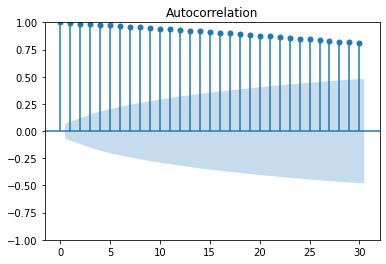

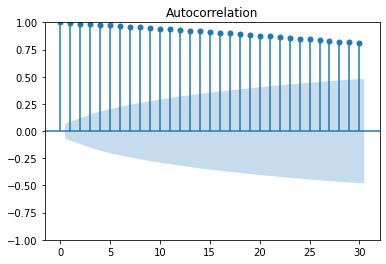

In [3]:
# Draw Autocorrelation
plot_acf(train)

In [4]:
# Since the p-value is larger than 0.05 (say alpha = 0.05), we need to do the differencing
def adf_test(series):
    res = adfuller(series)
    print('ADF Statistic: %f' % res[0])
    print('p-value: %f' % res[1])
    return res

In [5]:
# Checking the original data without differencing
test_result = adf_test(train)

ADF Statistic: -0.237311
p-value: 0.933926


In [6]:
# 1st difference
diff_1 = train.diff(periods=1)
diff_1 = diff_1.iloc[1:]

In [7]:
test_result = adf_test(diff_1)

ADF Statistic: -6.956157
p-value: 0.000000


In [8]:
model = auto_arima(train, d=1, D=1)

In [16]:
dataset.tail()

,Date,Price
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032
846,2020-07,1840.807


In [17]:
to_predict = list(range(847, 1500))
predict = pd.DataFrame(model.predict(n_periods = 653), columns=['Predict Result'], index = to_predict)

In [18]:
predict

,Predict Result
847,1866.819277
848,1874.906677
849,1892.839979
850,1903.298036
851,1917.231617
...,...
1495,3569.488343
1496,3571.842369
1497,3574.196396
1498,3576.550422


In [40]:
draw_x = dataset.iloc[:, 0:1].values
draw_y = dataset.iloc[:, 1].values
draw_x = np.array(draw_x)
for item in draw_x:
    item[0] = (float(item[0][0:4]) * 12) + (float(item[0][5:]))

pred_x = list(range(24248, 24901))

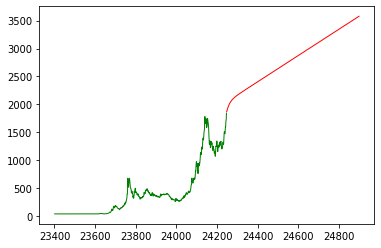

In [43]:
import matplotlib.pyplot as plt 
plt.plot(draw_x, draw_y, lw=1,  color='green')
plt.plot(pred_x, predict, lw=1,  color='red')

In [ ]:
from sklearn import metrics
mse = metrics.mean_squared_error(Y_test,Y_pred)
mae = metrics.mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
score = regressor.score(X_test,Y_test)

print("R-squared:", score)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

In [9]:
adf_test(train)

ADF Statistic: 2.182377
p-value: 0.998868


(2.182376953460721,
 0.9988676889328771,
 20,
 729,
 {'1%': -3.4393520240470554,
  '5%': -2.8655128165959236,
  '10%': -2.5688855736949163},
 6466.7759477716145)

In [10]:
diff_1 = train.diff(periods=1)
diff_1 = diff_1.iloc[1:]
adf_test(diff_1)

ADF Statistic: -5.157899
p-value: 0.000011


(-5.157899482708051,
 1.0709587069388628e-05,
 19,
 729,
 {'1%': -3.4393520240470554,
  '5%': -2.8655128165959236,
  '10%': -2.5688855736949163},
 6461.848190222528)

In [8]:
model = auto_arima(train, d=1, D=1)

In [13]:
print(train.size)
print(test.size)

750
97


In [9]:
to_predict = list(range(train.size+1, train.size+1+test.size))
predict = pd.DataFrame(model.predict(n_periods = test.size), columns=['Predict Result'], index = to_predict)

In [10]:
predict

,Predict Result
821,1332.431225
822,1337.586630
823,1336.464212
824,1340.101982
825,1340.130318
826,1342.895523
827,1343.585485
828,1345.849009
829,1346.919373
830,1348.894456


In [11]:
from sklearn import metrics
mse = metrics.mean_squared_error(test,predict)
mae = metrics.mean_absolute_error(test,predict)
rmse = np.sqrt(metrics.mean_squared_error(test,predict))

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 33247.048524166305
MAE: 144.88115913398772
RMSE: 182.3377320363679


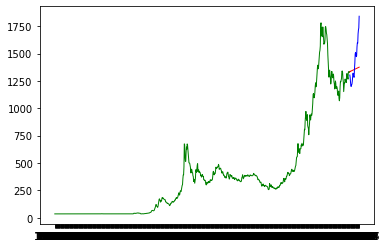

In [12]:
import matplotlib.pyplot as plt 
plt.plot(train_x, train, lw=1,  color='green')
plt.plot(test_x, predict, lw=1,  color='red')
plt.plot(test_x, test, lw=1, color='blue')

In [13]:
to_predict_more = list(range(train.size+1, train.size+1+test.size+500))
predict_more = pd.DataFrame(model.predict(n_periods = test.size+500), columns=['Predict Result'], index = to_predict_more)

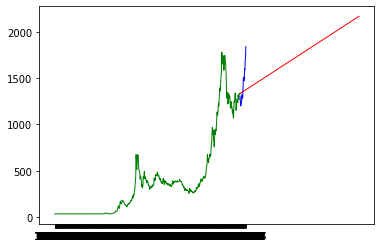

In [14]:
plt.plot(train_x, train, lw=1,  color='green')
plt.plot(to_predict_more, predict_more, lw=1,  color='red')
plt.plot(test_x, test, lw=1, color='blue')